# Exploratory Data Analysis
## Churn Modelling Dataset

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as mcolors

In [3]:
# Import Dataset
dataset = pd.read_csv("Churn_Modelling.csv")
dataset.head(6)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1


How we can see, this dataset contains records of bank customers who have (1) or have not (0) abandoned their respective account. Let's see what are the possible characteristics that indicate that a customer is likely to leave the bank.

In [5]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Statical Summary in numerical features

In [8]:
dataset.groupby("Exited")["CreditScore"].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,7963.0,651.853196,95.653837,405.0,585.0,653.0,718.0,850.0
1,2037.0,645.351497,100.321503,350.0,578.0,646.0,716.0,850.0


In [9]:
dataset.groupby("Exited")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,7963.0,37.408389,10.125363,18.0,31.0,36.0,41.0,92.0
1,2037.0,44.837997,9.761562,18.0,38.0,45.0,51.0,84.0


In [10]:
dataset.groupby("Exited")["Tenure"].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,7963.0,5.033279,2.880658,0.0,3.0,5.0,7.0,10.0
1,2037.0,4.932744,2.936106,0.0,2.0,5.0,8.0,10.0


In [11]:
dataset.groupby("Exited")["Balance"].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,7963.0,72745.296779,62848.040701,0.0,0.00,92072.68,126410.28,221532.80
1,2037.0,91108.539337,58360.794816,0.0,38340.02,109349.29,131433.33,250898.09


In [12]:
dataset.groupby("Exited")["NumOfProducts"].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,7963.0,1.544267,0.509536,1.0,1.0,2.0,2.0,3.0
1,2037.0,1.475209,0.801521,1.0,1.0,1.0,2.0,4.0


In [13]:
dataset.groupby("Exited")["EstimatedSalary"].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,7963.0,99738.391772,57405.586966,90.07,50783.49,99645.04,148609.955,199992.48
1,2037.0,101465.677531,57912.418071,11.58,51907.72,102460.84,152422.910,199808.10


### Categorical Features

In [15]:
dataset.groupby("Exited")["Exited"].count()

Exited
0    7963
1    2037
Name: Exited, dtype: int64

In [16]:
dataset.groupby("Exited")["Geography"].value_counts()

Exited  Geography
0       France       4204
        Spain        2064
        Germany      1695
1       Germany       814
        France        810
        Spain         413
Name: count, dtype: int64

In [17]:
dataset.groupby("Exited")["Gender"].value_counts()

Exited  Gender
0       Male      4559
        Female    3404
1       Female    1139
        Male       898
Name: count, dtype: int64

In [18]:
dataset.groupby("Exited")["HasCrCard"].value_counts()

Exited  HasCrCard
0       1            5631
        0            2332
1       1            1424
        0             613
Name: count, dtype: int64

In [19]:
dataset.groupby("Exited")["IsActiveMember"].value_counts()

Exited  IsActiveMember
0       1                 4416
        0                 3547
1       0                 1302
        1                  735
Name: count, dtype: int64

### Numerical Features Distribution

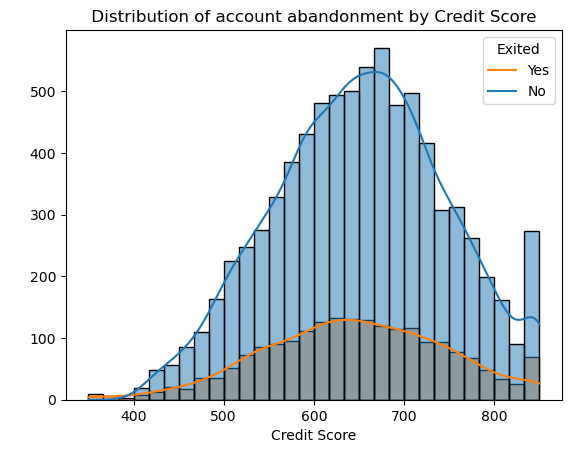

In [21]:
sns.histplot(
    data = dataset,
    x = "CreditScore",
    kde = True,
    hue = "Exited",
    bins = 30
)
plt.title(" Distribution of account abandonment by Credit Score ")
plt.xlabel("Credit Score")
plt.ylabel(" ")
plt.legend(["Yes", "No"], title = "Exited")

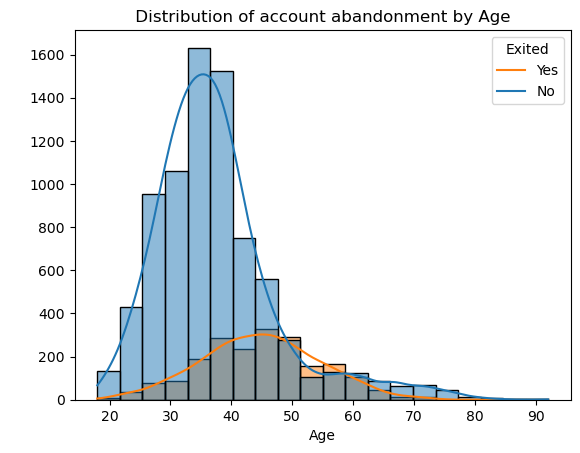

In [22]:
sns.histplot(
    data = dataset,
    x = "Age",
    kde = True,
    hue = "Exited",
    bins = 20
)
plt.title(" Distribution of account abandonment by Age ")
plt.xlabel("Age")
plt.ylabel(" ")
plt.legend(["Yes", "No"], title = "Exited")

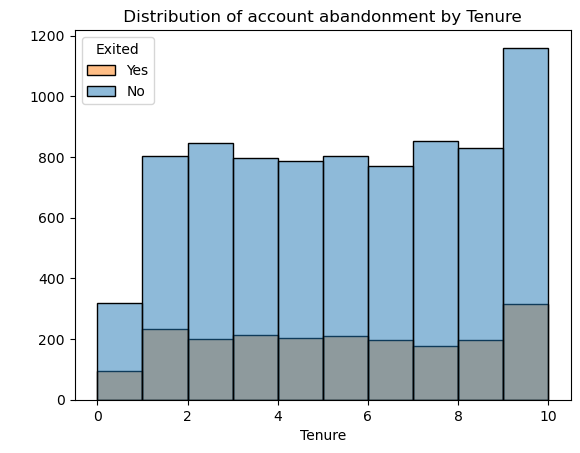

In [23]:
sns.histplot(
    data = dataset,
    x = "Tenure",
    kde = False,
    hue = "Exited",
    bins = 10
)
plt.title(" Distribution of account abandonment by Tenure ")
plt.xlabel("Tenure")
plt.ylabel(" ")
plt.legend(["Yes", "No"], title = "Exited")

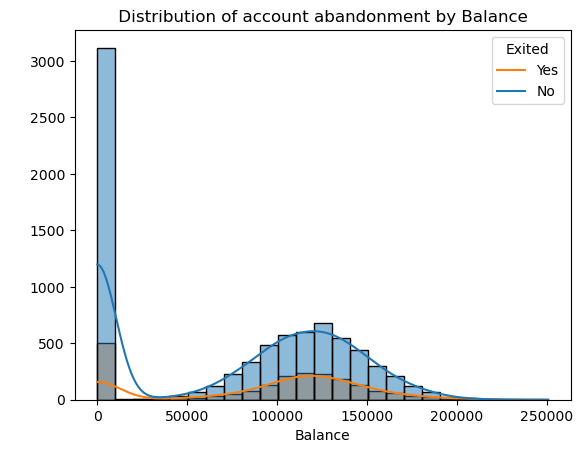

In [24]:
sns.histplot(
    data = dataset,
    x = "Balance",
    kde = True,
    hue = "Exited",
    bins = 25
)
plt.title(" Distribution of account abandonment by Balance ")
plt.xlabel("Balance")
plt.ylabel(" ")
plt.legend(["Yes", "No"], title = "Exited")

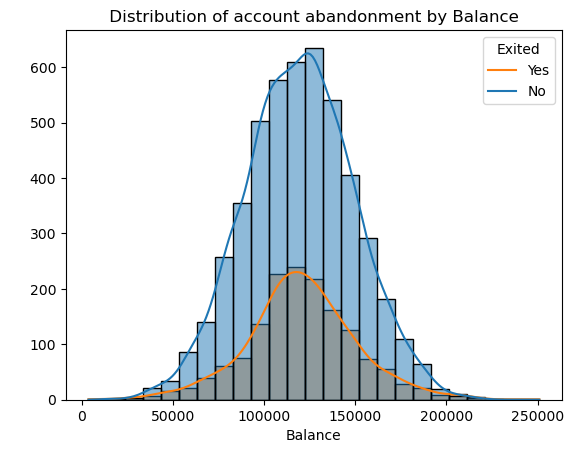

In [25]:
sns.histplot(
    data = dataset[dataset["Balance"] != 0.0],
    x = "Balance",
    kde = True,
    hue = "Exited",
    bins = 25
)
plt.title(" Distribution of account abandonment by Balance ")
plt.xlabel("Balance")
plt.ylabel(" ")
plt.legend(["Yes", "No"], title = "Exited")

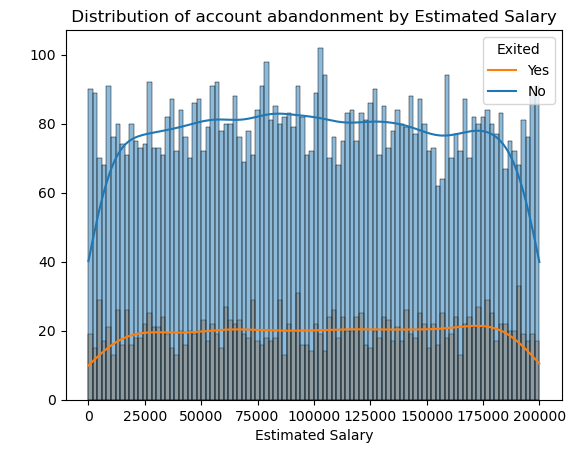

In [26]:
sns.histplot(
    data = dataset,
    x = "EstimatedSalary",
    kde = True,
    hue = "Exited",
    bins = 100
)
plt.title(" Distribution of account abandonment by Estimated Salary ")
plt.xlabel("Estimated Salary")
plt.ylabel(" ")
plt.legend(["Yes", "No"], title = "Exited")

### Categorical Features Distribution

In [28]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [29]:
geo_France = dataset[dataset["Geography"] == "France"].groupby("Exited").agg({"CustomerId": "count"}).reset_index()
geo_France

,Exited,CustomerId
0,0,4204
1,1,810


In [30]:
geo_Spain = dataset[dataset["Geography"] == "Spain"].groupby("Exited").agg({"CustomerId": "count"}).reset_index()
geo_Spain

,Exited,CustomerId
0,0,2064
1,1,413


In [31]:
geo_Germany = dataset[dataset["Geography"] == "Germany"].groupby("Exited").agg({"CustomerId": "count"}).reset_index()
geo_Germany

,Exited,CustomerId
0,0,1695
1,1,814


In [32]:
geo_grpd = pd.DataFrame(dataset.groupby(["Geography", "Exited"])["CustomerId"].count()).reset_index()
geo_grpd

,Geography,Exited,CustomerId
0,France,0,4204
1,France,1,810
2,Germany,0,1695
3,Germany,1,814
4,Spain,0,2064
5,Spain,1,413


In [33]:
geographys = dataset["Geography"].unique()
geographys

array(['France', 'Spain', 'Germany'], dtype=object)

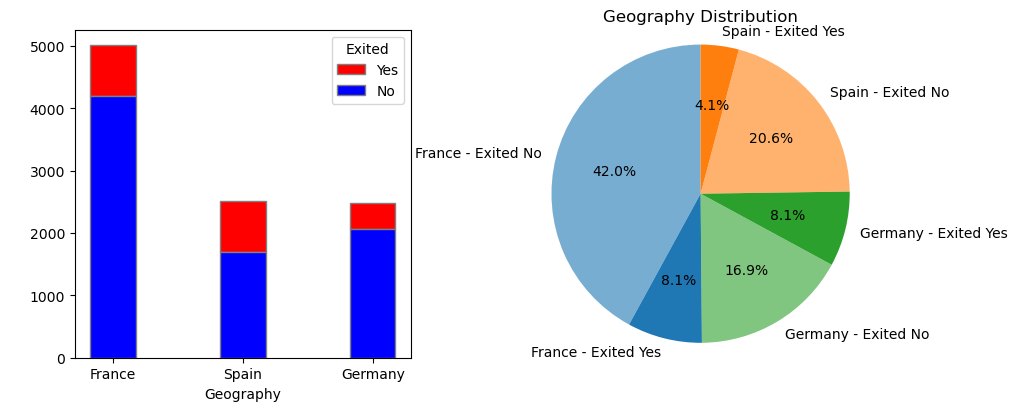

In [34]:
r_Geography = np.arange(len(geographys))

geo_yes = geo_grpd[geo_grpd["Exited"] == 1].groupby("Geography").agg({"CustomerId": "sum"}).reset_index()["CustomerId"]
geo_no = geo_grpd[geo_grpd["Exited"] == 0].groupby("Geography").agg({"CustomerId": "sum"}).reset_index()["CustomerId"]

geo_colors = {"France": '#1f77b4', "Spain": '#ff7f0e', "Germany": '#2ca02c'}

fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout = True, gridspec_kw={ 'width_ratios': [1, 1] })

fig.set_size_inches(10, 4)

ax1.bar(r_Geography, geo_yes, bottom = geo_no, color = "r", edgecolor = "grey", width = 0.35, label = "Yes")
ax1.bar(r_Geography, geo_no, color = "b", edgecolor = "grey", width = 0.35, label = "No")

ax1.set_xlabel("Geography")
ax1.set_ylabel(" ")
ax1.set_title(" ")

ax1.set_xticks(r_Geography, geographys)

ax1.legend(["Yes", "No"], title = "Exited")

geo_grpd["Color"] = geo_grpd.apply(lambda x: mcolors.to_rgba(geo_colors[x["Geography"]], alpha = 0.6 + 0.4*x["Exited"]), axis=1)
labels = [f"{row['Geography']} - Exited {'Yes' if row['Exited'] == 1 else 'No'}" for index, row in geo_grpd.iterrows()]
colors = geo_grpd["Color"].tolist()
ax2.pie(geo_grpd["CustomerId"],  labels = labels, colors = colors, autopct = '%1.1f%%', startangle = 90)

ax2.axis("equal")

ax2.set_title("Geography Distribution")

plt.show()

In [35]:
gend_Male = dataset[dataset["Gender"] == "Male"].groupby("Exited").agg({"CustomerId": "count"}).reset_index()
gend_Male

,Exited,CustomerId
0,0,4559
1,1,898


In [36]:
gend_Fem = dataset[dataset["Gender"] == "Female"].groupby("Exited").agg({"CustomerId": "count"}).reset_index()
gend_Fem

,Exited,CustomerId
0,0,3404
1,1,1139


In [37]:
gend_grpd = pd.DataFrame(dataset.groupby(["Gender", "Exited"])["CustomerId"].count()).reset_index()
gend_grpd

,Gender,Exited,CustomerId
0,Female,0,3404
1,Female,1,1139
2,Male,0,4559
3,Male,1,898


In [38]:
genders = dataset["Gender"].unique()
genders

array(['Female', 'Male'], dtype=object)

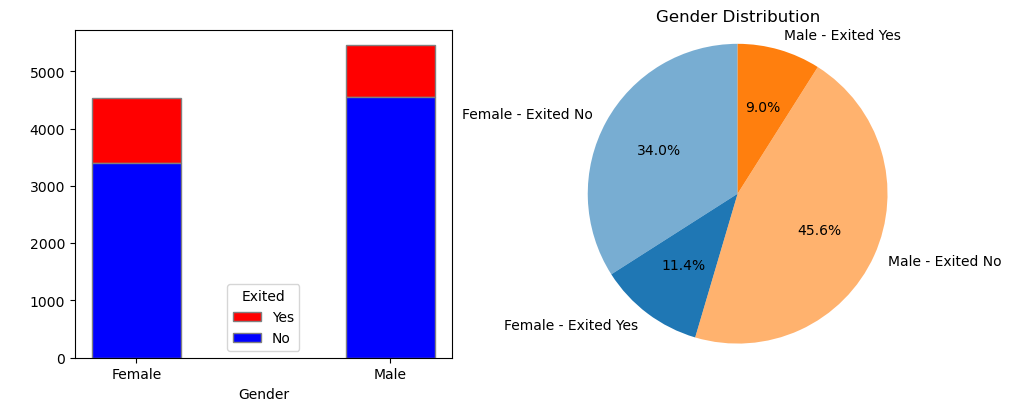

In [39]:
r_Gender = np.arange(len(genders))

gend_yes = gend_grpd[gend_grpd["Exited"] == 1].groupby("Gender").agg({"CustomerId": "sum"}).reset_index()["CustomerId"]
gend_no = gend_grpd[gend_grpd["Exited"] == 0].groupby("Gender").agg({"CustomerId": "sum"}).reset_index()["CustomerId"]

gend_colors = {"Female": '#1f77b4', "Male": '#ff7f0e'}

fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout = True, gridspec_kw={ 'width_ratios': [1, 1] })

fig.set_size_inches(10, 4)

ax1.bar(r_Gender, gend_yes, bottom = gend_no, color = "r", edgecolor = "grey", width = 0.35, label = "Yes")
ax1.bar(r_Gender, gend_no, color = "b", edgecolor = "grey", width = 0.35, label = "No")

ax1.set_xlabel("Gender")
ax1.set_ylabel(" ")
ax1.set_title(" ")

ax1.set_xticks(r_Gender, genders)

ax1.legend(["Yes", "No"], title = "Exited")

gend_grpd["Color"] = gend_grpd.apply(lambda x: mcolors.to_rgba(gend_colors[x["Gender"]], alpha = 0.6 + 0.4*x["Exited"]), axis=1)
labels = [f"{row['Gender']} - Exited {'Yes' if row['Exited'] == 1 else 'No'}" for index, row in gend_grpd.iterrows()]
colors = gend_grpd["Color"].tolist()
ax2.pie(gend_grpd["CustomerId"],  labels = labels, colors = colors, autopct = '%1.1f%%', startangle = 90)

ax2.axis("equal")

ax2.set_title("Gender Distribution")

plt.show()

In [40]:
CrCard_grpd = pd.DataFrame(dataset.groupby(["HasCrCard", "Exited"])["CustomerId"].count()).reset_index()
CrCard_grpd

,HasCrCard,Exited,CustomerId
0,0,0,2332
1,0,1,613
2,1,0,5631
3,1,1,1424


In [41]:
CrCards = dataset["HasCrCard"].unique()
CrCards

array([1, 0], dtype=int64)

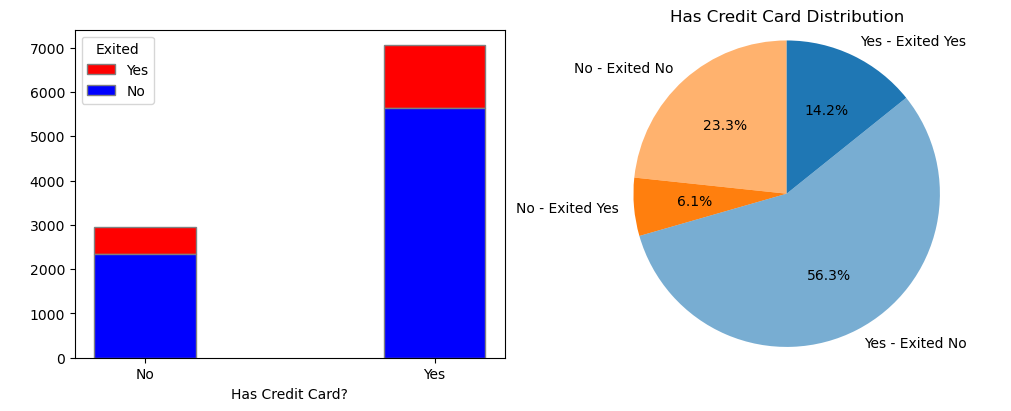

In [42]:
r_CrCards = np.arange(len(CrCards))

CrCard_yes = CrCard_grpd[CrCard_grpd["Exited"] == 1].groupby("HasCrCard").agg({"CustomerId": "sum"}).reset_index()["CustomerId"]
CrCard_no = CrCard_grpd[CrCard_grpd["Exited"] == 0].groupby("HasCrCard").agg({"CustomerId": "sum"}).reset_index()["CustomerId"]

CrCard_colors = {1: '#1f77b4', 0: '#ff7f0e'}

fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout = True, gridspec_kw = { 'width_ratios': [1, 1] })

fig.set_size_inches(10, 4)

ax1.bar(r_CrCards, CrCard_yes, bottom = CrCard_no, color = "r", edgecolor = "grey", width = 0.35, label = "Yes")
ax1.bar(r_CrCards, CrCard_no, color = "b", edgecolor = "grey", width = 0.35, label = "No")

ax1.set_xlabel("Has Credit Card?")
ax1.set_ylabel(" ")
ax1.set_title(" ")

ax1.set_xticks(r_CrCards, [f"{'Yes' if CrCards[i] == 1 else 'No'}" for i in CrCards])

ax1.legend(["Yes", "No"], title = "Exited")

CrCard_grpd["Color"] = CrCard_grpd.apply(lambda x: mcolors.to_rgba(CrCard_colors[x["HasCrCard"]], alpha = 0.6 + 0.4*x["Exited"]), axis=1)
labels = [f"{'Yes' if row['HasCrCard'] == 1 else 'No'} - Exited {'Yes' if row['Exited'] == 1 else 'No'}" for index, row in CrCard_grpd.iterrows()]
colors = CrCard_grpd["Color"].tolist()
ax2.pie(CrCard_grpd["CustomerId"],  labels = labels, colors = colors, autopct = '%1.1f%%', startangle = 90)

ax2.axis("equal")

ax2.set_title("Has Credit Card Distribution")

plt.show()

In [43]:
IAM_grpd = pd.DataFrame(dataset.groupby(["IsActiveMember", "Exited"])["CustomerId"].count()).reset_index()
IAM_grpd

,IsActiveMember,Exited,CustomerId
0,0,0,3547
1,0,1,1302
2,1,0,4416
3,1,1,735


In [44]:
IAMs = dataset["IsActiveMember"].unique()
IAMs

array([1, 0], dtype=int64)

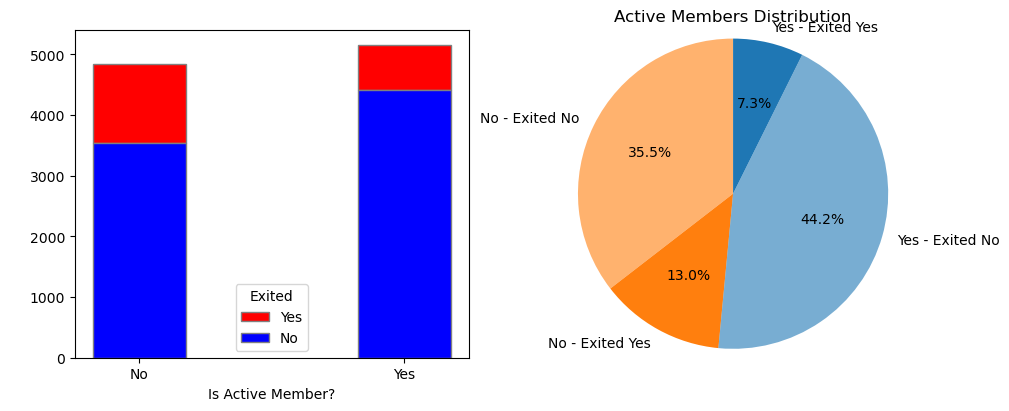

In [45]:
r_IAMs = np.arange(len(IAMs))

IAM_yes = IAM_grpd[IAM_grpd["Exited"] == 1].groupby("IsActiveMember").agg({"CustomerId": "sum"}).reset_index()["CustomerId"]
IAM_no = IAM_grpd[IAM_grpd["Exited"] == 0].groupby("IsActiveMember").agg({"CustomerId": "sum"}).reset_index()["CustomerId"]

IAM_colors = {1: '#1f77b4', 0: '#ff7f0e'}

fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout = True, gridspec_kw = { 'width_ratios': [1, 1] })

fig.set_size_inches(10, 4)

ax1.bar(r_IAMs, IAM_yes, bottom = IAM_no, color = "r", edgecolor = "grey", width = 0.35, label = "Yes")
ax1.bar(r_IAMs, IAM_no, color = "b", edgecolor = "grey", width = 0.35, label = "No")

ax1.set_xlabel("Is Active Member?")
ax1.set_ylabel(" ")
ax1.set_title(" ")

ax1.set_xticks(r_IAMs, [f"{'Yes' if IAMs[i] == 1 else 'No'}" for i in IAMs])

ax1.legend(["Yes", "No"], title = "Exited")

IAM_grpd["Color"] = IAM_grpd.apply(lambda x: mcolors.to_rgba(IAM_colors[x["IsActiveMember"]], alpha = 0.6 + 0.4*x["Exited"]), axis=1)
labels = [f"{'Yes' if row['IsActiveMember'] == 1 else 'No'} - Exited {'Yes' if row['Exited'] == 1 else 'No'}" for index, row in IAM_grpd.iterrows()]
colors = IAM_grpd["Color"].tolist()
ax2.pie(IAM_grpd["CustomerId"],  labels = labels, colors = colors, autopct = '%1.1f%%', startangle = 90)

ax2.axis("equal")

ax2.set_title("Active Members Distribution")

plt.show()

### Relation between numerical features

In [47]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [99]:
num_cols = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary", "Exited"]

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


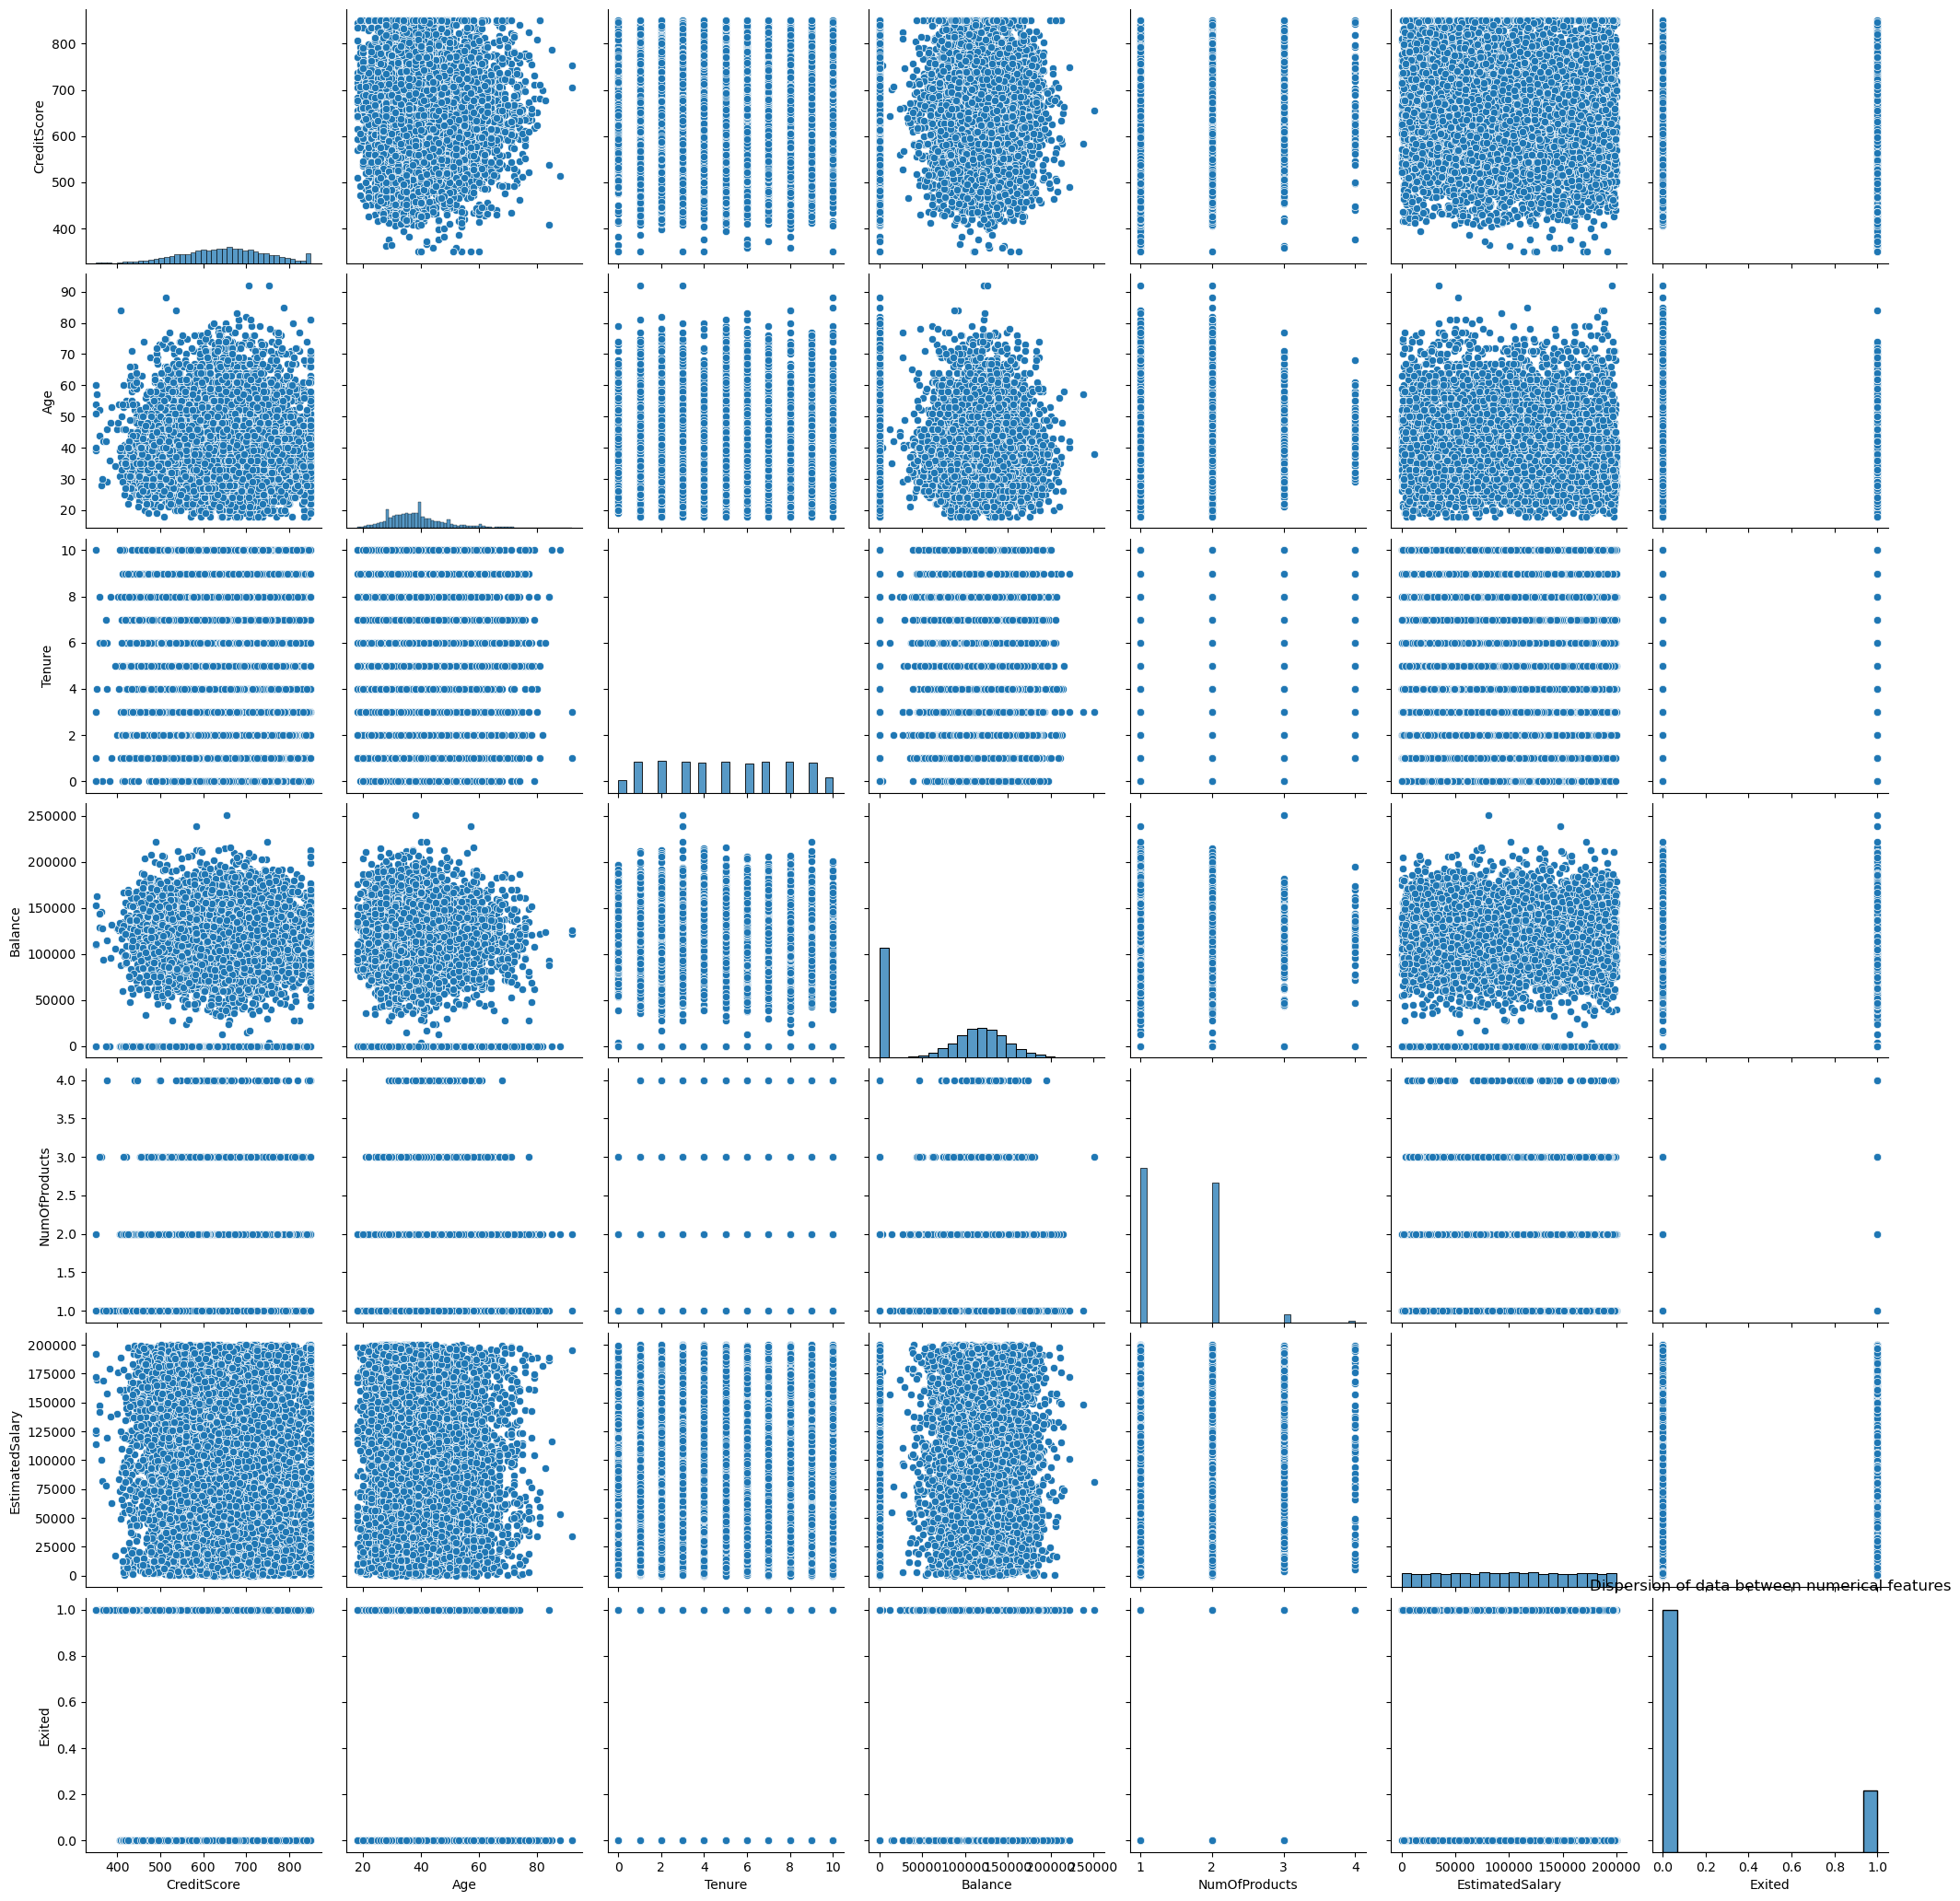

In [125]:
sns.pairplot(dataset[num_cols], height = 3.0)
plt.title("Dispersion of data between numerical features")
plt.show()

Identify the correlation matrix between numerical features

In [103]:
corr_mtx = dataset[cols].corr()
corr_mtx

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.014204,-0.047820
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,0.012097,1.000000


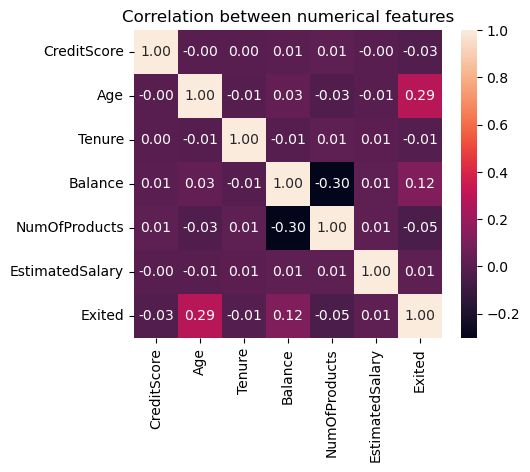

In [123]:
f, ax = plt.subplots(figsize = (5,4))
sns.heatmap(corr_mtx, cbar = True, annot = True, square = True, fmt = ".2f", annot_kws = {"size": 10})
plt.title("Correlation between numerical features")
plt.show()